## Question 1

#### Ali Furkan Kalay
#### 45625365

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Hands-on exercise** 

Consider 
$$ x^3-x-1 = 0.$$

This implies both 
$$ x = (x+1)^{1/3}$$
and
$$ x = x^3 -1.$$

Implement fixed-point iteration $x_{n+1} = f(x_n)$ from $x_0=1.0$, using
1. $f(x) = (x+1)^{1/3}$ and
2. $f(x) = x^3 -1.$

To guard against non-convergence, you may set a max number of iteration to terminate the iteration.


### Solution

I define the functions:

In [2]:
f = lambda x: (x+1)**(1/3)
g = lambda x: x**3 - 1

In [3]:
def fp(fun, x0 = 1, tolerance = 1e-8, iteration_max = 100):
    steps = []
    dx = np.absolute(x0-fun(x0)) # The initial convergence distance
    for i in range(iteration_max):
        if dx < np.absolute(x0-fun(x0)): # If the function diverges we stop immediately.
            print('The function diverges..')
            break
        dx = np.absolute(x0-fun(x0)) # Update convergance 
        if dx < tolerance:
            break
        x0 = fun(x0)
        steps.append(x0)
    return steps

In [4]:
points = fp(g)

The function diverges..


### Why g does not converge?

In [5]:
x = np.linspace(-5,5)
y = [3*i**2 for i in x]

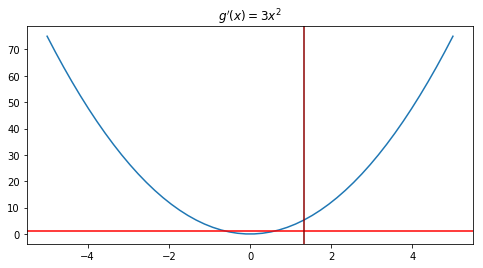

In [6]:
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.title('$g\'(x)=3x^2$')
plt.axhline(y=1,color='red' )
plt.axvline(x=1.3247179532369109,color='darkred' )
plt.show()

We know that $g'(x) = 3x^2$ where $||g'(1)|| = 3 > 1$. So $g$ does not converge to the root. Starting with a different initial value, $g$ still cannot diverge. Because the norm of the Jacobian matrix is still greater than 1 at the solution, i.g. $||g'(1.32)||> 1$. What if we have initial value with ||g'(x)||<1?

In [7]:
points = fp(g, x0=0)

The function diverges..


Because solution is not within the interval.

In [8]:
points

[-1, -2]

### Let's try $f$

In [9]:
points = fp(f)

In [10]:
points

[1.2599210498948732,
 1.3122938366832888,
 1.3223538191388249,
 1.324268744551578,
 1.3246326252509202,
 1.3247017485103587,
 1.3247148784409506,
 1.324717372435671,
 1.3247178461621456,
 1.3247179361449652,
 1.3247179532369109]

It converges very fast. 

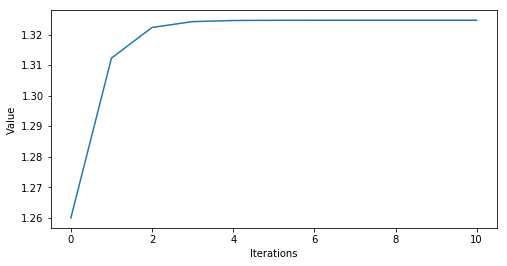

In [11]:
plt.figure(figsize=(8,4))
plt.plot(points)
plt.ylabel('Value')
plt.xlabel('Iterations')
plt.show()

The convergence point is:

In [12]:
print(points[-1])

1.3247179532369109


Let's compare $f'$ and $g'$. $f'(x) = (1/3)(1+x)^{-2/3}$:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


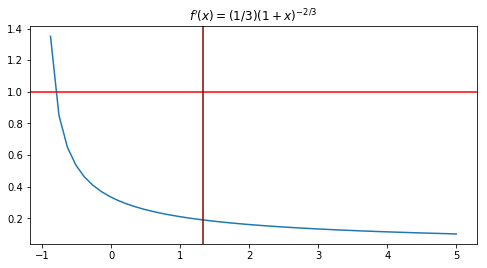

In [13]:
x = np.linspace(-1,5)
y = [(1/3)*(1+i)**(-2/3) for i in x]
plt.figure(figsize=(8,4))
plt.plot(x,y)
plt.title('$f\'(x)=(1/3)(1+x)^{-2/3}$')
plt.axhline(y=1,color='red' )
plt.axvline(x=1.3247179532369109,color='darkred' )
plt.show()

The condition is satisfied whenever $x\ge-1$. 

In [14]:
fp(f,x0=1000)

[10.003332222839093,
 2.22420463751057,
 1.4773187144402105,
 1.35309190077512,
 1.3300857164450086,
 1.3257367619969291,
 1.3249114476473403,
 1.3247547091008973,
 1.3247249381040938,
 1.3247192832350594,
 1.324718209112267,
 1.3247180050861647,
 1.3247179663320685]

In [15]:
fp(f,x0=-1.1)

[(0.23207944168063907+0.40197338438308494j),
 (1.0842522731289266+0.11440104130119826j),
 (1.2777972640164699+0.023357867523739292j),
 (1.3157602534855346+0.004497385355752118j),
 (1.323014834741073+0.0008564647232431448j),
 (1.3243943956067108+0.0001627622026414504j),
 (1.3246564956288445+3.091902261597387e-05j),
 (1.3247062827328684+5.873071797949459e-06j),
 (1.3247157397062248+1.115574715673689e-06j),
 (1.3247175360303807+2.1189994162349982e-07j),
 (1.3247178772364367+4.0249712994284166e-08j),
 (1.3247179420474264+7.645302897165956e-09j),
 (1.3247179543580643+1.4522005488920583e-09j)]

Now we are converging to `complex numbers`, so Fixed Point Optimization is sensitive to initial value. 